# ML Term Paper - Code: Describe Data
by Ann-Christin and Sarah 18/02/21

This notebook uses the piaac_red file to describe the data used in the analysis. 

# Compare Skill Level and Number of Trainings

In [108]:
# Packages to import 

import re

import random
#from PIL import Image
import seaborn as sns
import sklearn.decomposition
import sklearn.manifold
import umap #if missing: pip install umap
import scipy.stats



import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn import tree as tree
from pandas import Series, DataFrame

# set color theme
sns.set_theme()

print("done")

done


In [109]:
import os
path = "E:\Data\krea\PIAAC" #define your path here
#path = "C:/Users/gust/Documents/ML_term_paper"
os.chdir(path)
print("done")

done


In [110]:
data = pd.read_csv("data\piaac_red.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
data.shape

(230691, 129)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230691 entries, 0 to 230690
Columns: 129 entries, Unnamed: 0 to unempflag
dtypes: object(129)
memory usage: 227.0+ MB


In [112]:
data.describe()

,Unnamed: 0,cntryid,inpiaac,seqid,cnt_brth,ageg10lfs,age_r,gender_r,j_q03b,j_q03b_c,...,nfe12jr,nfe12njr,fnfaet12,fnfaet12jr,fnfaet12njr,nfehrsnjr,nfehrsjr,nfehrs,nopaidworkever,unempflag
count,230691,230691,3660,230691,160270,227031,166949,230689,103091,144543,...,216972,216972,200153,198853,198853,54687,54687,80121,228135,3477
unique,230691,36,2,26967,182,5,50,2,24,4,...,2,2,2,2,2,539,568,474,2,2
top,39547,Canada,1.0,779.0,Poland,35-44,21.0,Female,2.0,2.0,...,Did not participate in NFE for JR reasons,Did not participate in NFE for NJR reasons,Did not participate in formal or non-formal AET,Did not participate in formal or non-formal AE...,Did not participate in formal or non-formal AE...,0.0,0.0,40.0,Has had paid work,0.0
freq,1,26683,3296,35,9612,46872,3872,122830,44747,62576,...,140246,200186,106426,122590,182689,32659,6681,6877,204720,3339


In [113]:
# data cleaning, drop variables that have too few observations,are not relevant or collinear
data = data.drop(columns = ['Unnamed: 0', 'inpiaac', "racethn_5cat", "unempflag", "racethn_5cat", "c_q08c2", "seqid", "b_q04b", "b_q19a", 
                         "c_q08c2", "learnatwork", "nfehrsnjr", "nfehrsjr", "nfehrs", "earnmthselfppp", "d_q05b2", 
                          "yrsqual_t", "earnmthbonusppp",  "d_q16d5", "c_q02c", "isco1c", "c_d09", "isic1l", "cnt_h", "isced_hf", "isco1l", "isco1c", "c_d05",
                          'icthome','ictwork','b_q01a','b_q01a_t','yrsqual','ageg10lfs','cnt_brth','fnfaet12jr', 'fe12', 'aetpop', 'faet12', 'faet12jr', 'faet12njr', 
                           'nfe12', 'nfe12jr', 'nfe12njr', 'fnfaet12', 'fnfaet12jr', 'fnfaet12njr']) # exlude those to test the results 
#"isic2l", "isic2c", "isic_cus_c", "isic_lus_c", "isic4_c", "isic4_l",'cntry', 'cntry_e',

# further exclude 
data = data.drop(columns = ['d_q16b', 'b_q20b', 'b_d12h', 'b_q02a_t2', 'b_q11', 'b_q12e', 'd_q12a' , 'b_q04a', 'b_q16', 'b_q26b', 'b_q15c', 'd_q06c', 'b_q15b', 'd_q05a2', 
                          'b_q13', 'b_q15a', 'b_q16',  'b_q02a', 'b_q02a_t1', 'b_q05c', 'b_q10b', 'c_d06', 'd_q04', 'b_q12g'])


data = data.loc[:, ~data.columns.str.endswith('_c')]
#drop if skill level is missing 
#dcl = dcl[dcl.iscoskil4 != "A"]
#dcl = dcl[dcl.iscoskil4 != "N"]
#dcl = dcl[dcl.iscoskil4 != "U"]

## Changing Data Types

In [114]:
#dcl['d_q05a2'] = dcl['d_q05a2'].astype('object')
data['gender_r'] = data['gender_r'].astype('category')
data["age_r"] = pd.to_numeric(data["age_r"])
data['b_q12a'] = data['b_q12a'].astype('category') # yes/no open educational training
data['b_q12c'] = data['b_q12c'].astype('category') # yes/no on-job training
data['b_q12b'] = pd.to_numeric(data["b_q12b"]) # number of open/distance educational trainings
data["b_q12d"] = pd.to_numeric(data["b_q12d"]) # number of on-the-job training
#dcl['b_q12e'] = dcl['b_q12e'].astype('category')  # yes/no seminars training
data['b_q12f'] = pd.to_numeric(data["b_q12f"]) # number of seminars
#dcl['b_q12g'] = dcl['b_q12g'].astype('category')  # yes/no private training
data['b_q12h'] = pd.to_numeric(data["b_q12h"]) # number of private educational trainings
# dcl['j_q03a'] = dcl['j_q03a'].astype('category') # yes/no children
data['j_q03b'] = pd.to_numeric(data['j_q03b']) # number of children
#dcl['yrsqual_t'] = pd.to_numeric(dcl['yrsqual_t'])
data['yrsget'] = pd.to_numeric(data['yrsget'])
data['iscoskil4'] = data['iscoskil4'].astype('category')
#dcl['h_q05g'] = dcl['h_q05g'].astype('category') # Skill use everyday life - ICT - Computer - How often - Programming language  
#dcl['g_q05g'] = dcl['g_q05g'].astype('category') # skill use work - ICT programming lanugage how often
#dcl['g_q05'] = dcl['g_q05'].astype('category') # use computer at work yes/no

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230691 entries, 0 to 230690
Data columns (total 54 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   cntryid             230691 non-null  object  
 1   age_r               166949 non-null  float64 
 2   gender_r            230689 non-null  category
 3   j_q03b              103091 non-null  float64 
 4   j_q04a              228012 non-null  object  
 5   pared               215610 non-null  object  
 6   computerexperience  227980 non-null  object  
 7   yrsget              125736 non-null  float64 
 8   vet                 102508 non-null  object  
 9   edcat8              188436 non-null  object  
 10  leaver1624          43455 non-null   object  
 11  b_q01b              168921 non-null  object  
 12  b_q10a              38742 non-null   object  
 13  b_q10c              23065 non-null   object  
 14  b_q12a              217054 non-null  category
 15  b_q12b           

## Summary Statistics

In [46]:
data['gender_r'].describe

<bound method NDFrame.describe of 0           Male
1           Male
2         Female
3         Female
4           Male
           ...  
230686      Male
230687      Male
230688    Female
230689      Male
230690      Male
Name: gender_r, Length: 230691, dtype: category
Categories (2, object): ['Female', 'Male']>

In [47]:
data['gender_r'].value_counts()

Female    122830
Male      107859
Name: gender_r, dtype: int64

In [48]:
data['iscoskil4'].value_counts()

1    73090
2    53756
A    39985
3    38238
4    19363
U     3172
N      915
Name: iscoskil4, dtype: int64

In [ ]:

data['age_r'].describe

In [ ]:
data['age_r'].value_counts()

In [ ]:
#data['age_r'] = data['age_r'].astype('integer')

In [45]:
data['age_r'].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: age_r, Length: 230691, dtype: float64>

In [ ]:
data[["age_r"]].mean()

In [ ]:
data[["gender_r", "age_r"]].groupby("gender_r").mean()

In [ ]:

data['b_q12d'].describe


In [ ]:
#data.groupby('b_q12d').describe()
data.groupby('b_q12d').describe().unstack(1)

In [ ]:

data['b_q12b'].describe # number of open/distance educational trainings

In [64]:
imp=data[["iscoskil4", "b_q12d"]].groupby("iscoskil4").mean()
imp

,b_q12d
iscoskil4,
1,3.663530
2,2.956112
3,2.586005
4,2.456091
A,2.588336
N,3.611111
U,3.281385


In [66]:
from tabulate import tabulate
headers = ["Job classification", "Mean number of on-job trainings"]
print(tabulate(imp, headers, tablefmt="pipe"))

| Job classification   |   Mean number of on-job trainings |
|:---------------------|----------------------------------:|
| 1                    |                           3.66353 |
| 2                    |                           2.95611 |
| 3                    |                           2.586   |
| 4                    |                           2.45609 |
| A                    |                           2.58834 |
| N                    |                           3.61111 |
| U                    |                           3.28139 |


In [ ]:

data['b_q12a'].describe# yes/no open educational training

In [67]:
imp=data[["iscoskil4", "b_q12b"]].groupby("iscoskil4").mean()
imp

,b_q12b
iscoskil4,
1,2.840328
2,2.215437
3,2.229478
4,1.752504
A,1.999160
N,3.168675
U,2.218750


In [68]:
from tabulate import tabulate
headers = ["Job classification", "Mean number of off-job trainings"]
print(tabulate(imp, headers, tablefmt="pipe"))

| Job classification   |   Mean number of off-job trainings |
|:---------------------|-----------------------------------:|
| 1                    |                            2.84033 |
| 2                    |                            2.21544 |
| 3                    |                            2.22948 |
| 4                    |                            1.7525  |
| A                    |                            1.99916 |
| N                    |                            3.16867 |
| U                    |                            2.21875 |


In [6]:

data['b_q12e'].describe # yes/no semianrs / workshops

<bound method NDFrame.describe of 0          No
1         Yes
2          No
3          No
4          No
         ... 
230686    Yes
230687     No
230688     No
230689     No
230690     No
Name: b_q12e, Length: 230691, dtype: category
Categories (2, object): [No, Yes]>

In [7]:

data['b_q12f'].describe # number of seminars 

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: b_q12f, Length: 230691, dtype: float64>

In [8]:

data['b_q12g'].describe # yes/no private training

<bound method NDFrame.describe of 0         No
1         No
2         No
3         No
4         No
          ..
230686    No
230687    No
230688    No
230689    No
230690    No
Name: b_q12g, Length: 230691, dtype: category
Categories (2, object): [No, Yes]>

In [9]:

data['b_q12h'].describe # number of private educational trainings

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: b_q12h, Length: 230691, dtype: float64>

In [10]:

data['iscoskil4'].describe

<bound method NDFrame.describe of 0         A
1         1
2         4
3         2
4         1
         ..
230686    2
230687    3
230688    2
230689    3
230690    1
Name: iscoskil4, Length: 230691, dtype: object>

In [11]:

data['j_q03b'].describe # number of children

<bound method NDFrame.describe of 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
230686    NaN
230687    NaN
230688    NaN
230689    NaN
230690    NaN
Name: j_q03b, Length: 230691, dtype: object>

In [12]:

data['yrsqual_t'].describe

<bound method NDFrame.describe of 0          NaN
1         19.0
2          NaN
3          NaN
4          NaN
          ... 
230686     NaN
230687     NaN
230688     NaN
230689     NaN
230690     NaN
Name: yrsqual_t, Length: 230691, dtype: object>

In [13]:
data['yrsget'].describe

<bound method NDFrame.describe of 0          NaN
1         19.0
2          NaN
3          NaN
4          NaN
          ... 
230686     8.0
230687    11.0
230688    11.0
230689    12.0
230690     NaN
Name: yrsget, Length: 230691, dtype: object>

In [15]:
#col_names = ['age_r', 'gender_r', 'b_q12d', 'b_q12a', 'b_q12e', 'iscoskil4', 'yrsqual_t', 'yrsget', 'h_q05g']

for ii in ['age_r', 'gender_r', 'b_q12d', 'b_q12a', 'b_q12e', 'iscoskil4', 'yrsqual_t', 'yrsget']:
    print(data[[ii]].mean)
   
    
    
    
    #for ii, band in enumerate(bands):
    #    sns.histplot(dataframe[band].values.reshape(-1,), ax=ax[ii], kde=True, bins=25) # Reshape into 1D array
     #   ax[ii].set_title('{} band'.format(band_names[ii])) # Subplot titles

#data[['age_r', 'gender_r', 'b_q12d', 'b_q12a', 'b_q12e', 'iscoskil4', 'yrsqual_t', 'yrsget', 'h_q05g']].describe()

<bound method DataFrame.mean of         age_r
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
...       ...
230686    NaN
230687    NaN
230688    NaN
230689    NaN
230690    NaN

[230691 rows x 1 columns]>
<bound method DataFrame.mean of        gender_r
0          Male
1          Male
2        Female
3        Female
4          Male
...         ...
230686     Male
230687     Male
230688   Female
230689     Male
230690     Male

[230691 rows x 1 columns]>
<bound method DataFrame.mean of         b_q12d
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
...        ...
230686     NaN
230687     NaN
230688     NaN
230689     NaN
230690     NaN

[230691 rows x 1 columns]>
<bound method DataFrame.mean of        b_q12a
0          No
1         Yes
2          No
3          No
4         Yes
...       ...
230686     No
230687     No
230688     No
230689     No
230690     No

[230691 rows x 1 columns]>
<bound method DataFrame.mean of        b_q12e
0     

KeyError: "None of [Index(['h_q05g'], dtype='object')] are in the [columns]"

## Histograms
### Plots of demographics

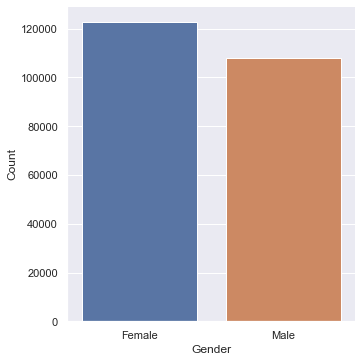

In [34]:
sns_plot = sns.catplot(x="gender_r", kind="count", data=data)
#plt.title('Gender of Respondent')
#plt.grid(axis='both')
plt.xlabel('Gender')
plt.ylabel('Count')
sns_plot.savefig("results/plots/barplot_gender.png")


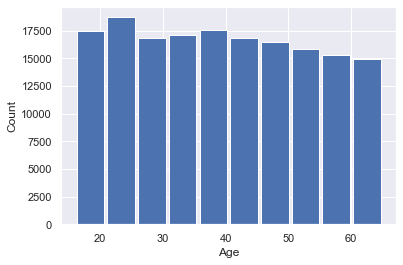

In [33]:
plt.hist(x='age_r', bins=10, range=None, density=False,  histtype='bar',rwidth=0.9, data=data)
#plt.title('Age of Respondent')
#plt.grid(axis='both')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('results\plots\hist_age.png', bbox_inches='tight')

### Trainings - plots

- b_q12b = number of open/distance educational trainings
- b_q12d = number of on-the-job training
- b_q12f = number of seminars
- b_q12h = number of private educational trainings

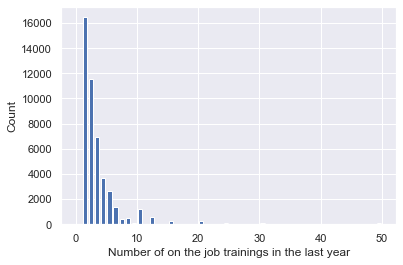

In [32]:
plt.hist(x='b_q12d', bins=50, range=None, density=False,  histtype='bar',rwidth=0.7, data=data)
#plt.title('On the job training')
#plt.grid(axis='both')
plt.xlabel('Number of on the job trainings in the last year')
plt.ylabel('Count')
plt.savefig('results\plots\hist_count_onthejob.png', bbox_inches='tight')


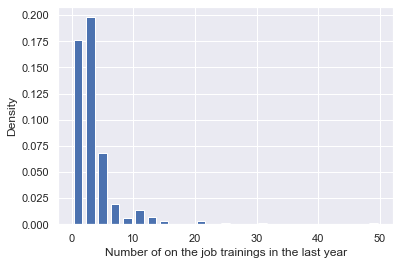

In [35]:
plt.hist(x='b_q12d', bins=25, range=None, density=True,  histtype='bar',rwidth=0.7, data=data)
#plt.title('On the job training')
#plt.grid(axis='both')
plt.xlabel('Number of on the job trainings in the last year')
plt.ylabel('Density')
plt.savefig('results\plots\hist_density_onthejob.png', bbox_inches='tight')


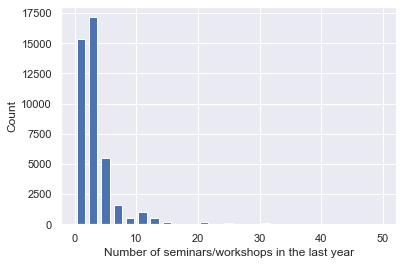

In [36]:
plt.hist(x='b_q12f', bins=25, range=None, density=False,  histtype='bar',rwidth=0.7, data=data)
#plt.title('Seminars / Workshops')
#plt.grid(axis='both')
plt.xlabel('Number of seminars/workshops in the last year')
plt.ylabel('Count')
plt.savefig('results\plots\hist_count_seminars.png', bbox_inches='tight')


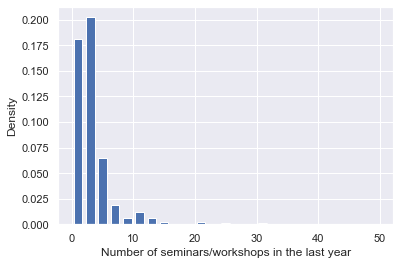

In [39]:
plt.hist(x='b_q12f', bins=25, range=None, density=True,  histtype='bar',rwidth=0.7, data=data)
#plt.title('On the job training')
#plt.grid(axis='both')
plt.xlabel('Number of seminars/workshops in the last year')
plt.ylabel('Density')
plt.savefig('results\plots\hist_density_seminars.png', bbox_inches='tight')


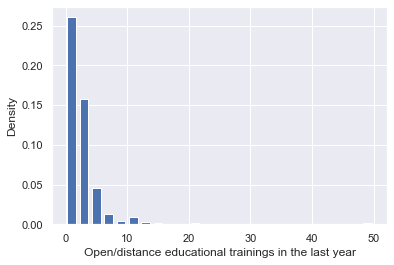

In [40]:
plt.hist(x='b_q12b', bins=25, range=None, density=True,  histtype='bar',rwidth=0.7, data=data)
#plt.title('Open/distance educational trainings')
#plt.grid(axis='both')
plt.xlabel('Open/distance educational trainings in the last year')
plt.ylabel('Density')
plt.savefig('results\plots\hist_density_open.png', bbox_inches='tight')


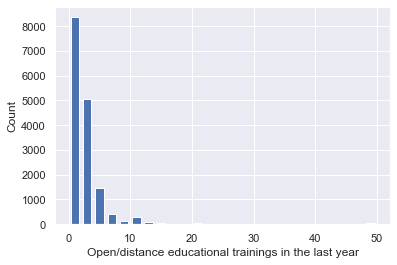

In [41]:
plt.hist(x='b_q12b', bins=25, range=None, density=False,  histtype='bar',rwidth=0.7, data=data)
#plt.title('Open/distance educational trainings')
#plt.grid(axis='both')
plt.xlabel('Open/distance educational trainings in the last year')
plt.ylabel('Count')
plt.savefig('results\plots\hist_count_open.png', bbox_inches='tight')


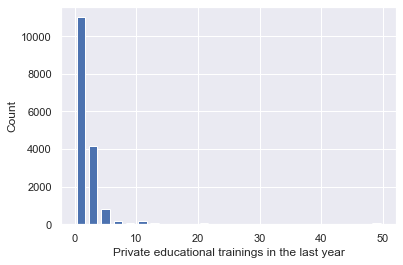

In [42]:
plt.hist(x='b_q12h', bins=25, range=None, density=False,  histtype='bar',rwidth=0.7, data=data)
#plt.title('Private educational trainings')
#plt.grid(axis='both')
plt.xlabel('Private educational trainings in the last year')
plt.ylabel('Count')
plt.savefig('results\plots\hist_count_private.png', bbox_inches='tight')


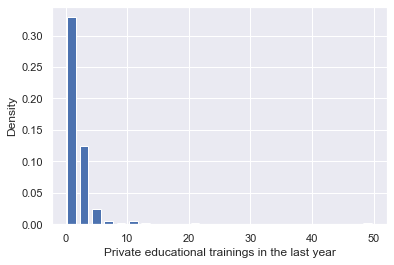

In [43]:
plt.hist(x='b_q12h', bins=25, range=None, density=True,  histtype='bar',rwidth=0.7, data=data)
#plt.title('Private educational trainings')
#plt.grid(axis='both')
plt.xlabel('Private educational trainings in the last year')
plt.ylabel('Density')
plt.savefig('results\plots\hist_density_private.png', bbox_inches='tight')


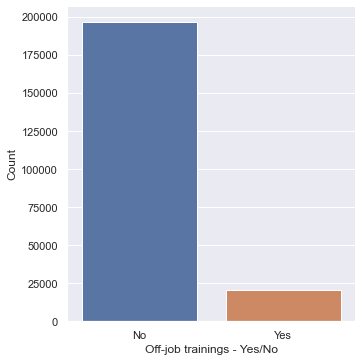

In [105]:
sns_plot = sns.catplot(x="b_q12a", kind="count", data=data)
#plt.title('Gender of Respondent')
#plt.grid(axis='both')
plt.xlabel('Off-job trainings - Yes/No')
plt.ylabel('Count')
sns_plot.savefig("results/plots/barplot_binary_offJob.png")


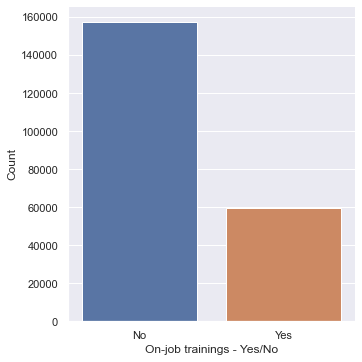

In [106]:
sns_plot = sns.catplot(x="b_q12c", kind="count", data=data)
#plt.title('Gender of Respondent')
#plt.grid(axis='both')
plt.xlabel('On-job trainings - Yes/No')
plt.ylabel('Count')
sns_plot.savefig("results/plots/barplot_binary_onJob.png")


### Plots - Skills

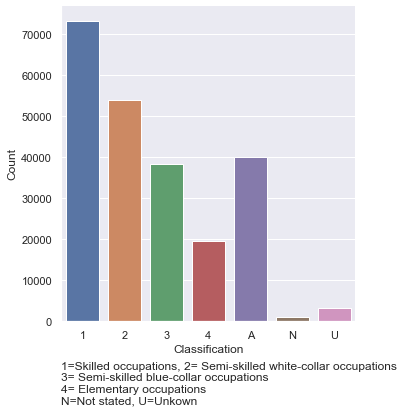

In [44]:
sns_plot = sns.catplot(x="iscoskil4", kind="count", data=data)
#plt.title('Job Classification')
#plt.grid(axis='both')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.annotate('1=Skilled occupations, 2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')

sns_plot.savefig("results/plots/barplot_job_classification.png")


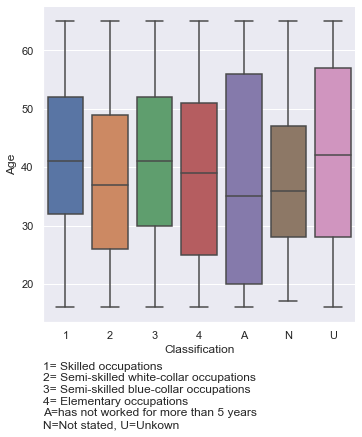

In [116]:
sns_plot = sns.catplot(x="iscoskil4", y="age_r",kind="box", data=data)
#plt.title('Job Classification')
#plt.grid(axis='both')
plt.xlabel('Classification')
plt.ylabel('Age')
plt.annotate('1= Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nA=has not worked for more than 5 years \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')

sns_plot.savefig("results/plots/box_age_job_classification.png")


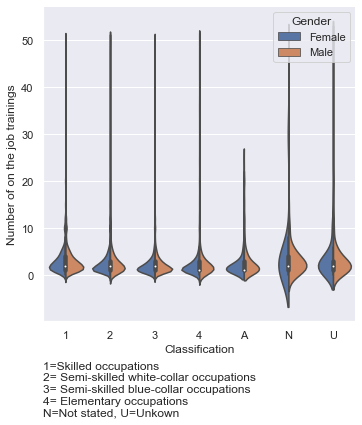

In [49]:
sns_plot = sns.catplot(x="iscoskil4", y="b_q12d",kind="violin", hue="gender_r", split=True,data=data, legend=False)
#plt.title('Job Classification and On the Job Trainings')
#plt.grid(axis='both')
plt.xlabel('Classification')
plt.ylabel('Number of on the job trainings')
plt.annotate('1=Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.legend(title='Gender',loc='upper right')
sns_plot.savefig("results/plots/violin_gender_OntheJob_classification.png")



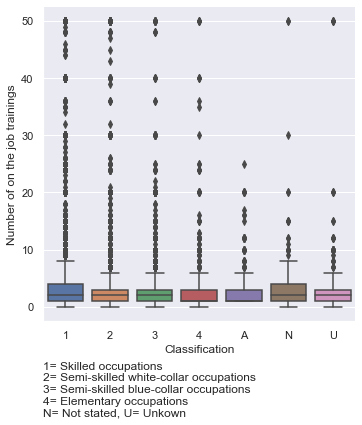

In [123]:
sns_plot = sns.catplot(x="iscoskil4", y="b_q12d", kind="box", data=data)
plt.xlabel('Classification')
plt.ylabel('Number of on the job trainings')
plt.annotate('1= Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nN= Not stated, U= Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
sns_plot.savefig("box_OntheJob_classification.png")



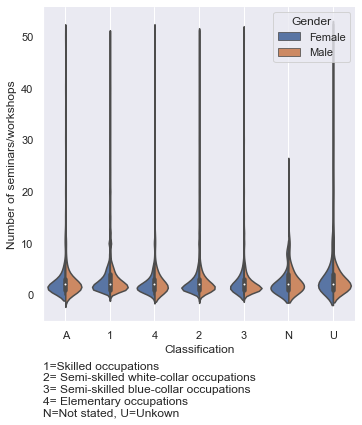

In [39]:
sns_plot = sns.catplot(x="iscoskil4", y="b_q12f",kind="violin", hue="gender_r", split=True,data=data, legend=False)
#plt.title('Job Classification and Seminars/Workshops')
plt.grid(axis='both')
plt.xlabel('Classification')
plt.ylabel('Number of seminars/workshops')
plt.annotate('1=Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.legend(title='Gender',loc='upper right')
sns_plot.savefig("results/plots/violin_gender_seminars_classification.png")


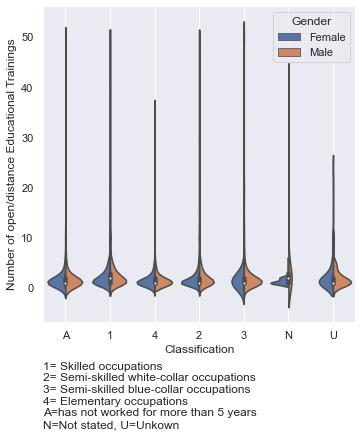

In [41]:
sns_plot = sns.catplot(x="iscoskil4", y="b_q12b",kind="violin",hue="gender_r", split=True, data=data,  legend=False)
#plt.title('Job Classification and Number of open/distance Educational Trainings')
plt.grid(axis='both')
plt.ylabel('Number of open/distance Educational Trainings')
plt.xlabel('Classification')
plt.annotate('1= Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nA=has not worked for more than 5 years \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.legend(title='Gender',loc='upper right')
sns_plot.savefig("results/plots/violin_gender_open_classification.png")


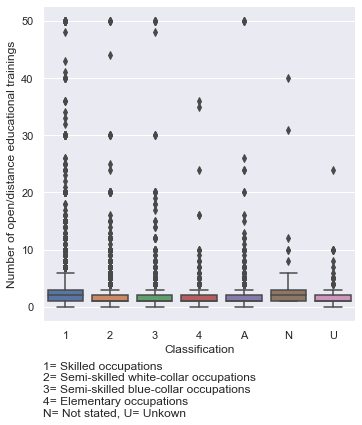

In [126]:
sns_plot = sns.catplot(x="iscoskil4", y="b_q12b", kind="box", data=data)
plt.xlabel('Classification')
plt.ylabel('Number of open/distance educational trainings')
plt.annotate('1= Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nN= Not stated, U= Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
sns_plot.savefig("plots/box_OpenJob_classification.png")


## Regressions to test for correlations between middle-skilled jobs and trainings

- b_q12b = number of open/distance educational trainings
- b_q12d = number of on-the-job training
- b_q12f = number of seminars
- b_q12h = number of private educational trainings

In [ ]:
import statsmodels.formula.api as sm
from stargazer.stargazer import Stargazer

### Prepare for Regression - Create dummies 

- for the occupational level
- for the use of ICT skill





In [ ]:
data2 = pd.get_dummies(data, columns = ['iscoskil4', 'h_q05g', 'g_q05g'])
data2.head

In [ ]:
data2.rename(columns={'h_q05g_Every day': 'h_q05g_5', 'h_q05g_At least once a week but not every day': 'h_q05g_4','h_q05g_Less than once a week but at least once a month': 'h_q05g_3', 'h_q05g_Less than once a month': 'h_q05g_2', 'h_q05g_Never': 'h_q05g_1'}, inplace=True)
data2.rename(columns={'g_q05g_Every day': 'g_q05g_5', 'g_q05g_At least once a week but not every day': 'g_q05g_4','g_q05g_Less than once a week but at least once a month': 'g_q05g_3', 'g_q05g_Less than once a month': 'g_q05g_2', 'g_q05g_Never': 'g_q05g_1'}, inplace=True)

data2.head()


#### Number of on-the-job training

In [ ]:
result_ojt = sm.ols(formula="b_q12d ~  gender_r + yrsqual_t + j_q03a + iscoskil4_1 + iscoskil4_2 + iscoskil4_3 + iscoskil4_4 + iscoskil4_U + iscoskil4_N + h_q05g_5 + h_q05g_4 + h_q05g_3 + h_q05g_2 +g_q05g_5 + g_q05g_4 + g_q05g_3 + g_q05g_2", data=data2).fit()
result_ojt.summary()

#print(result.params)




#### number of open/distance educational trainings

In [ ]:
result_od = sm.ols(formula="b_q12b ~ gender_r + yrsqual_t + j_q03a + iscoskil4_1 + iscoskil4_2 + iscoskil4_3 + iscoskil4_4 + iscoskil4_U + iscoskil4_N + h_q05g_5 + h_q05g_4 + h_q05g_3 + h_q05g_2 +g_q05g_5 + g_q05g_4 + g_q05g_3 + g_q05g_2", data=data2).fit()
result_od.summary()

#print(result.params)




#### number of seminars


In [ ]:
result_sem = sm.ols(formula="b_q12f ~  gender_r + yrsqual_t + j_q03a + iscoskil4_1 + iscoskil4_2 + iscoskil4_3 + iscoskil4_4 + iscoskil4_U + iscoskil4_N + h_q05g_5 + h_q05g_4 + h_q05g_3 + h_q05g_2 +g_q05g_5 + g_q05g_4 + g_q05g_3 + g_q05g_2", data=data2).fit()
result_sem.summary()

#print(result.params)

#### number of private educational trainings

In [ ]:
result_priv = sm.ols(formula="b_q12h ~  gender_r + yrsqual_t + j_q03a + iscoskil4_1 + iscoskil4_2 + iscoskil4_3 + iscoskil4_4 + iscoskil4_U + iscoskil4_N + h_q05g_5 + h_q05g_4 + h_q05g_3 + h_q05g_2 +g_q05g_5 + g_q05g_4 + g_q05g_3 + g_q05g_2", data=data2).fit()
result_priv.summary()

#print(result.params)


In [ ]:
stargazer = Stargazer([result_ojt, result_od, result_sem, result_priv])
stargazer.custom_columns(['On the job training', 'Open/Distance training', 'Seminars/Workshops', 'Private Lessons'], [1, 1, 1, 1])
stargazer.significant_digits(2)
stargazer.show_confidence_intervals(True)
stargazer.rename_covariates({'gender_r[T.Male]':'Gender:Male','g_q05g_3':'Programming at work-Less than once a week','g_q05g_4':'Programming at work-Less than everyday','g_q05g_5':'Programming at work-Everyday','g_q05g_2':'Programming at work-Less than once a month','h_q05g_3':'Programming at home-Less than once a week','h_q05g_4':'Programming at home-Less than everyday','h_q05g_5':'Programming at home-Everyday','h_q05g_2':'Programming at home-Less than once a month','iscoskil4_1':'Skilled occupations','iscoskil4_2':'Semi-skilled white-collar','iscoskil4_3':'Semi-skilled blue-collar','iscoskil4_4':'Elementary occupations','iscoskil4_U':'Unknown occupation','iscoskil4_N':'not stated occupation','j_q03a[T.Yes]':'Children:Yes','yrsqual_t':'Total years of schooling'})
#stargazer.rename_covariates({'g_q05g_3':'Programming at work-Less than once a week'})
#stargazer.rename_covariates({'g_q05g_4':'Programming at work-Less than everyday'})
#stargazer.rename_covariates({'g_q05g_5': 'Programming at work-Everyday'})
#stargazer.rename_covariates({'g_q05g_2': 'Programming at work-Less than once a month'})
stargazer
#stargazer.render_latex()
#stargazer.render_html()

In [ ]:
#sns.regplot(x="b_q12d", y="iscoskil4", data=data)
#sns.lmplot(x="iscoskil4", y="b_q12h", data=data,x_estimator=np.mean)
#sns.lmplot(x="b_q12h", y="iscoskil4", data=data,logistic=True, y_jitter=.03)

In [ ]:
#plt.scatter(x="yrsget", y="b_q12d", s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None, data=data)